In [1]:
%matplotlib inline

import sys
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

In [4]:
ct_test = pd.read_csv('clean2_car_price.csv') 
print(ct_test.shape)
ct_test.head()

(5471, 10)


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,Diesel,Manual,1,2017.0,1956.0,5.0
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,Petrol,Automatic,1,2021.0,1330.0,5.0
2,2,Toyota Camry 2.5 G,16.40,60343.0,Petrol,Automatic,1,2016.0,2494.0,5.0
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,Petrol,Manual,1,2016.0,1199.0,5.0
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,Petrol,Automatic,1,2017.0,1197.0,5.0


In [5]:
mean_rate = ct_test['car_prices_in_rupee'].mean()

stdev_rate = ct_test['car_prices_in_rupee'].std(ddof=0)

In [6]:
print('Mean participation rate is {:.3f}'.format(mean_rate))
print('Standard deviation is {:.3f}'.format(stdev_rate))

Mean participation rate is 11.678
Standard deviation is 19.729


In [7]:
zscore_rate = ss.zscore(ct_test['car_prices_in_rupee'], ddof=0)
ct_test = ct_test.assign(zscore=zscore_rate)
ct_test.head(8)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,Diesel,Manual,1,2017.0,1956.0,5.0,-0.083515
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,Petrol,Automatic,1,2021.0,1330.0,5.0,0.058409
2,2,Toyota Camry 2.5 G,16.40,60343.0,Petrol,Automatic,1,2016.0,2494.0,5.0,0.239361
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,Petrol,Manual,1,2016.0,1199.0,5.0,-0.330867
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,Petrol,Automatic,1,2017.0,1197.0,5.0,-0.203643
5,6,Volkswagen Vento 1.2 TSI Highline Plus AT,7.58,43688.0,Petrol,Automatic,1,2017.0,1197.0,5.0,-0.207698
6,7,Honda WR-V VX Diesel,11.60,14470.0,Diesel,Manual,1,2021.0,1498.0,5.0,-0.003936
7,8,Honda City i VTEC CVT SV,6.99,21429.0,Petrol,Automatic,1,2015.0,1497.0,5.0,-0.237603


In [10]:
def plot_anomaly(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data < threshold)
    
    
    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier],'o', color='b',label='Car Prize')
    plt.plot(ranks[mask_outlier], score_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score vs. car_prices_in_rupee', fontweight='bold')
    plt.xlabel('car_prices_in_rupee')
    plt.ylabel('Z-score')
    plt.show()

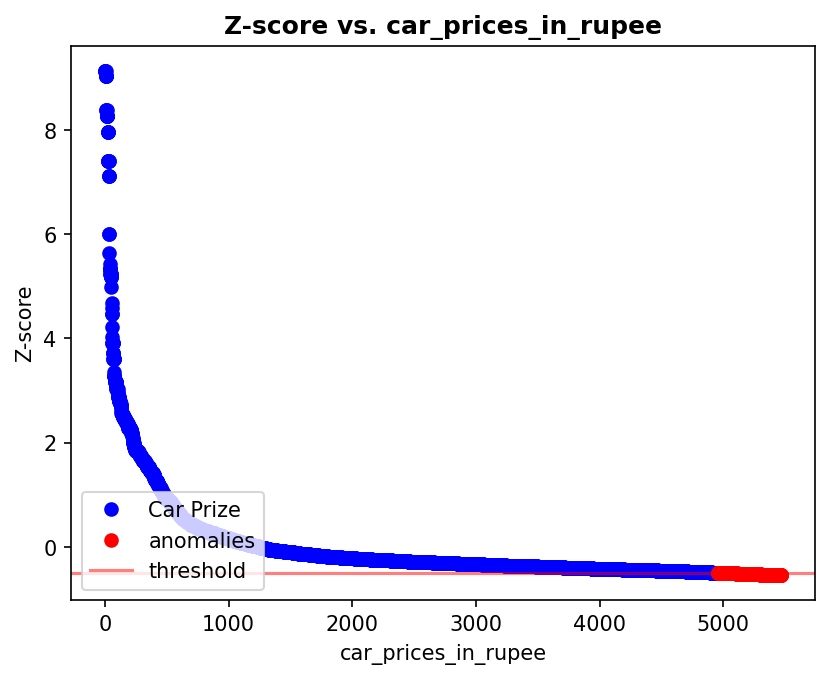

In [20]:
plot_anomaly(ct_test['zscore'], -0.5)

In [19]:
zscore_anomalies = ct_test[(ct_test['zscore'] < -0.5)]
zscore_anomalies

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
63,68,Maruti A-Star Zxi,1.53,46257.0,Petrol,Manual,3,2008.0,998.0,5.0,-0.514354
67,72,Maruti Wagon R VXI BS IV,1.80,128004.0,Petrol,Manual,2,2012.0,998.0,5.0,-0.500669
68,73,Chevrolet Beat Diesel PS,1.10,150349.0,Diesel,Manual,1,2012.0,936.0,5.0,-0.536150
99,105,Maruti Swift VDI BSIV,1.80,110000.0,Diesel,Manual,2,2010.0,1248.0,5.0,-0.500669
169,178,Honda Jazz Active,1.30,90000.0,Petrol,Manual,3,2009.0,1198.0,5.0,-0.526012
...,...,...,...,...,...,...,...,...,...,...,...
5390,5449,Hyundai Santro Xing GLS,1.10,70000.0,Petrol,Manual,2,2008.0,1527.0,4.0,-0.536150
5396,5455,Chevrolet Beat Diesel LT,1.40,110000.0,Diesel,Manual,1,2013.0,2184.0,5.0,-0.520944
5398,5457,Maruti Zen D,1.00,120000.0,Diesel,Manual,3,2005.0,1248.0,5.0,-0.541219
5418,5477,Mahindra Logan Diesel 1.5 DLE,1.30,155000.0,Diesel,Manual,3,2010.0,1248.0,4.0,-0.526012


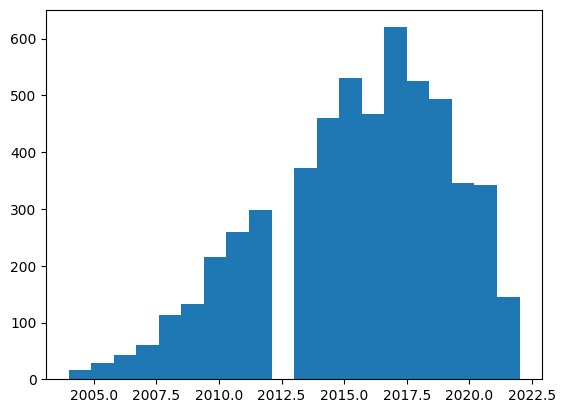

In [23]:
nbins= 20
n_hist, bins_hist, patches_hist = plt.hist(ct_test['manufacture'], nbins, density=False,
                           cumulative=False, linewidth=1.0, label='data')

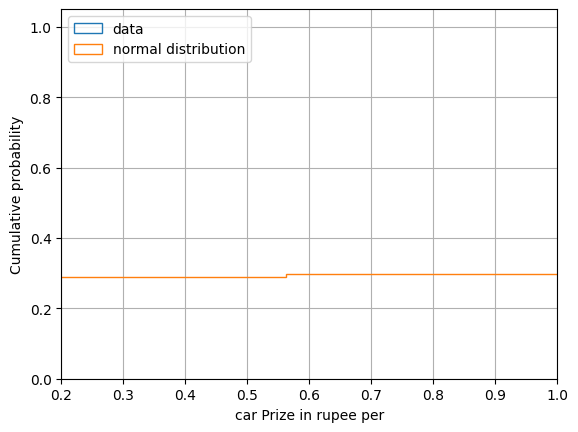

In [32]:
num_bins = 130
normal_dist = [random.gauss(mean_rate, stdev_rate) for _ in range(500)]
n, bins, patches = plt.hist(ct_test['Seats'], num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=1.0, label='data')
plt.hist(normal_dist, num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=1.0, label='normal distribution')
plt.grid(True)
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_xlim([0.2,1.0])
plt.xlabel('car Prize in rupee per')
plt.ylabel('Cumulative probability')
plt.show()